In [3]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


data = pd.read_csv('nse.csv')
#display
data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,31-May-22,MSC,Mumias Sugar Company Ltd,0.27,0.27,0.27,0.27,0.27,0.27,-,-,-,-
6728,31-May-22,UNGA,Unga Group Ltd,26.1,36.4,29,29,29,30,-1,3.33%,"2,100",-
6729,31-May-22,SCOM,Safaricom Plc,25.5,45.25,25.95,26.45,26,26.25,-0.25,0.95%,"20,079,900",-
6730,31-May-22,FAHR,Stanlib Fahari Income-REIT,5,7.48,5.5,5.6,5.56,5.58,-0.02,0.36%,"11,700",-


In [4]:
print(data.info())
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            6732 non-null   object
 1   Code            6732 non-null   object
 2   Name            6732 non-null   object
 3   12m Low         6732 non-null   object
 4   12m High        6732 non-null   object
 5   Day Low         6732 non-null   object
 6   Day High        6732 non-null   object
 7   Day Price       6732 non-null   object
 8   Previous        6732 non-null   object
 9   Change          6732 non-null   object
 10  Change%         6732 non-null   object
 11  Volume          6732 non-null   object
 12  Adjusted Price  6732 non-null   object
dtypes: object(13)
memory usage: 683.8+ KB
None


(6732, 13)

In [6]:
#cleaning columns first before training
columns_to_clean = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Change']

for column in columns_to_clean:
    if data[column].dtype == 'O':
        data[column] = data[column].replace('-', np.nan)
        data[column] = data[column].str.replace(',', '').astype(float)


In [7]:
data['Volume'] = data['Volume'].replace('-',np.nan)
data['Volume'] = data['Volume'].replace(',', '')


In [8]:
data['Change%'] = data['Change%'].replace('-',np.nan)
data['Change%'] = data['Change%'].str.replace(',','%', '').astype(float)

In [9]:
#save the now cleaned stock data in a new file
data.to_csv("cleaned_stock_data.csv", index=False)

CLEANED DATA

In [10]:
data = pd.read_csv("cleaned_stock_data.csv")
data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10.00,15.00,13.50,13.80,13.5,13.50,NaN,NaN,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355.00,427.00,385.00,385.00,385,385.00,NaN,NaN,NaN,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80.00,101.00,99.50,99.50,99.5,95.50,4.00,NaN,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260.00,360.00,320.00,320.00,320,320.00,NaN,NaN,NaN,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.60,18.70,18.70,18.7,18.70,NaN,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,31-May-22,MSC,Mumias Sugar Company Ltd,0.27,0.27,0.27,0.27,0.27,0.27,NaN,NaN,NaN,-
6728,31-May-22,UNGA,Unga Group Ltd,26.10,36.40,29.00,29.00,29,30.00,-1.00,NaN,"2,100",-
6729,31-May-22,SCOM,Safaricom Plc,25.50,45.25,25.95,26.45,26,26.25,-0.25,NaN,"20,079,900",-
6730,31-May-22,FAHR,Stanlib Fahari Income-REIT,5.00,7.48,5.50,5.60,5.56,5.58,-0.02,NaN,"11,700",-


In [11]:
#create a new column using the change ccolumn
data['Price_Direction'] = np.where(data['Change'] > 0, 'Up', 'Down')

In [12]:
#preprocessin on data column
data['Volume'] = pd.to_numeric(data['Volume'].str.replace(',', '').replace('-', np.nan), errors='coerce')
selected_features = ['Volume', 'Change']
#drop columns with NaN to remain with relevant data
data = data.dropna(subset=selected_features + ['Price_Direction'])

In [13]:
#input features
X = data[selected_features]
#target variable
y = data['Price_Direction']

In [14]:
from sklearn.model_selection import train_test_split
#data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
#standardised features, instantiate knn,fit data to cl

KNeighborsClassifier()

In [16]:
y_pred = knn_classifier.predict(X_test)


In [17]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.69


In [18]:
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

        Down       0.70      0.76      0.73       411
          Up       0.68      0.60      0.64       341

    accuracy                           0.69       752
   macro avg       0.69      0.68      0.68       752
weighted avg       0.69      0.69      0.69       752



In [19]:
precision = metrics.precision_score(y_test, y_pred, pos_label='Up')
print(f'Precision: {precision:.2f}')

Precision: 0.68


In [20]:
recall = metrics.recall_score(y_test, y_pred, pos_label='Up')
print(f'Recall: {recall:.2f}')


Recall: 0.60


In [21]:
f1 = metrics.f1_score(y_test, y_pred, pos_label='Up')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.64


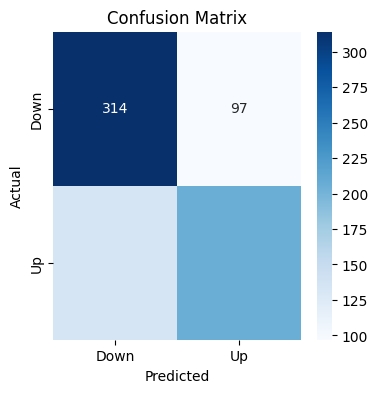

In [22]:
import seaborn as sns

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

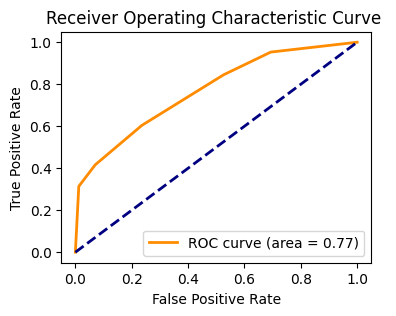

In [23]:
from sklearn.metrics import roc_curve, auc


y_score_knn = knn_classifier.predict_proba(X_test)[:, 1]
y_test_binary_knn = (y_test == 'Up').astype(int)
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary_knn, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(4, 3))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve ')
plt.legend(loc='lower right')
plt.show()


In [24]:

loss = 1 - accuracy
print(f"Loss: {loss:.2f}")

Loss: 0.31


In [25]:
y_train_numeric = y_train.map({'Up': 1, 'Down': 0})
y_test_numeric = y_test.map({'Up': 1, 'Down': 0})
knn_classifier.fit(X_train, y_train_numeric)
y_pred_numeric = knn_classifier.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 0.56


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')
mean_cv_accuracy = cross_val_scores.mean()

print(f'Cross validation for knn: {mean_cv_accuracy:.2f}')

Cross validation for knn: 0.70


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [28]:
data['Adjusted Price'] = pd.to_numeric(data['Adjusted Price'], errors='coerce')


/tmp/ipykernel_103120/212172808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adjusted Price'] = pd.to_numeric(data['Adjusted Price'], errors='coerce')


In [29]:
data.dropna(subset=['Adjusted Price'], inplace=True)


/tmp/ipykernel_103120/3611546252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Adjusted Price'], inplace=True)


In [30]:
X_regression = data[['Volume', 'Change']]
y_regression = data['Adjusted Price']

In [31]:
from sklearn.model_selection import train_test_split

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

In [32]:
regression_model = LinearRegression()
regression_model.fit(X_train_regression, y_train_regression)


LinearRegression()

In [33]:
y_pred_regression = regression_model.predict(X_test_regression)


In [34]:
mse = mean_squared_error(y_test_regression, y_pred_regression)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 25.58367336473285


In [35]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 5.058030581632821


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores_regression = cross_val_score(regression_model, X_regression, y_regression, cv=cv, scoring='neg_mean_squared_error')
mean_cv_mse = -cross_val_scores_regression.mean()

print(f'Mean Cross-Validation MSE: {mean_cv_mse:.2f}')

Mean Cross-Validation MSE: 23.00


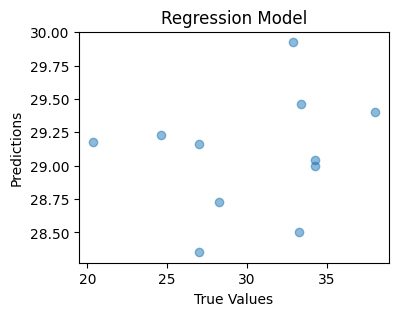

In [37]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test_regression, y_pred_regression, alpha=0.5)
plt.title('Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

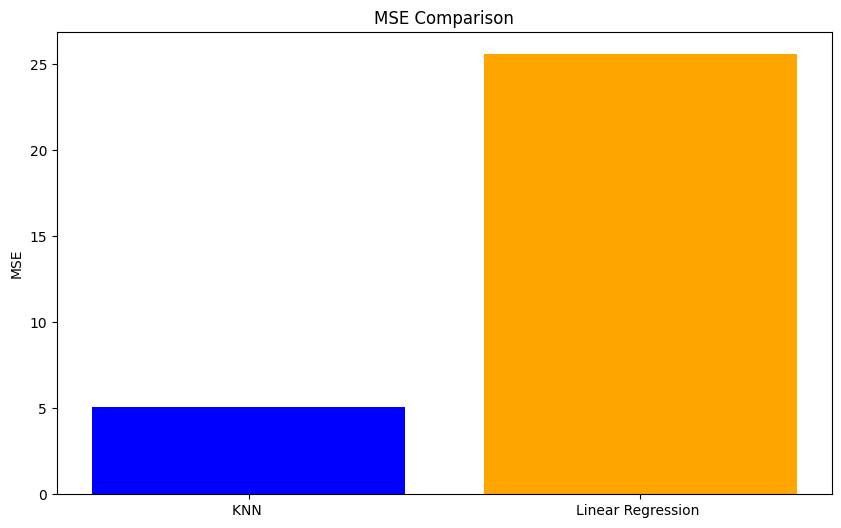

In [38]:
mse_values = [rmse , mse]

models = ['KNN ', 'Linear Regression ']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.show()